In [ ]:
import pandas as pd
df = pd.read_csv('/content/combined_files.csv')
df.head()

,StoreName,AlternateStoreCode,RefPromoCode,BillDate,BillTime,MRP,ProductLevelDisc%,BillNumber,ProductLevelDiscAmount,CustomerCode,...,AlternateProductGroupCode,New customer Type,ItemCost,CostOfSale,TaxPercentage,GrossWithDiscount,BatchSupplier,Profit,AlternateCode2,BulkDescription
0,Infinity Technologies - Bazaar Marg,991001524748,NaN,01/01/2023,6:45 PM,59491.52,0.0,HPWBM22230004,0.0,1096398,...,KV,NEW,53452.20,53452.20,18,59491.52,Savex Technologies Pvt. Ltd. - Delhi,10708.4700,NaN,NaN
1,Infinity Technologies - Bazaar Marg,991001524748,NaN,01/01/2023,6:45 PM,423.59,0.0,HPWBM22230004,0.0,1096398,...,9G,NEW,367.50,367.50,18,423.59,Savex Technologies Pvt. Ltd. - Delhi,76.2462,NaN,NaN
2,Infinity Technologies_Shankar Road,991001037904,NaN,01/01/2023,4:50 PM,18848.00,0.0,HPWIT660,0.0,380194,...,GC,EXISTING,12884.16,12884.16,18,13559.32,Savex Technologies Pvt. Ltd. - Delhi,2440.6780,NaN,NaN
3,Infinity Technologies_Shankar Road,991001037904,NaN,01/01/2023,6:39 PM,50565.00,0.0,HPWIT661,0.0,524213,...,KV,EXISTING,36239.90,36239.90,18,35000.00,Savex Technologies Pvt. Ltd. - Gurgaon,6300.0000,NaN,NaN
4,Infinity Technologies_Shankar Road,991001037904,NaN,01/01/2023,6:39 PM,677.12,0.0,HPWIT661,0.0,524213,...,9G,EXISTING,336.00,336.00,18,677.12,Savex Technologies Pvt. Ltd. - Delhi,121.8816,NaN,NaN


In [ ]:
print(df.columns)

Index(['StoreName', 'AlternateStoreCode', 'RefPromoCode', 'BillDate',
       'BillTime', 'MRP', 'ProductLevelDisc%', 'BillNumber',
       'ProductLevelDiscAmount', 'CustomerCode', 'CustomerName', 'ProductName',
       'Quantity', 'BaseValue', 'Tax', 'TaxDescription', 'Amount', 'SGST',
       'CGST', 'IGST', 'CategoryCode', 'EANCode', 'Department',
       'PromotionName', 'StoreCode', 'ProductGroup', 'AlternateGroupCode',
       'DeliveryType', 'ProductGroupCode', 'AlternateProductGroupCode',
       'New customer Type', 'ItemCost', 'CostOfSale', 'TaxPercentage',
       'GrossWithDiscount', 'BatchSupplier', 'Profit', 'AlternateCode2',
       'BulkDescription'],
      dtype='object')


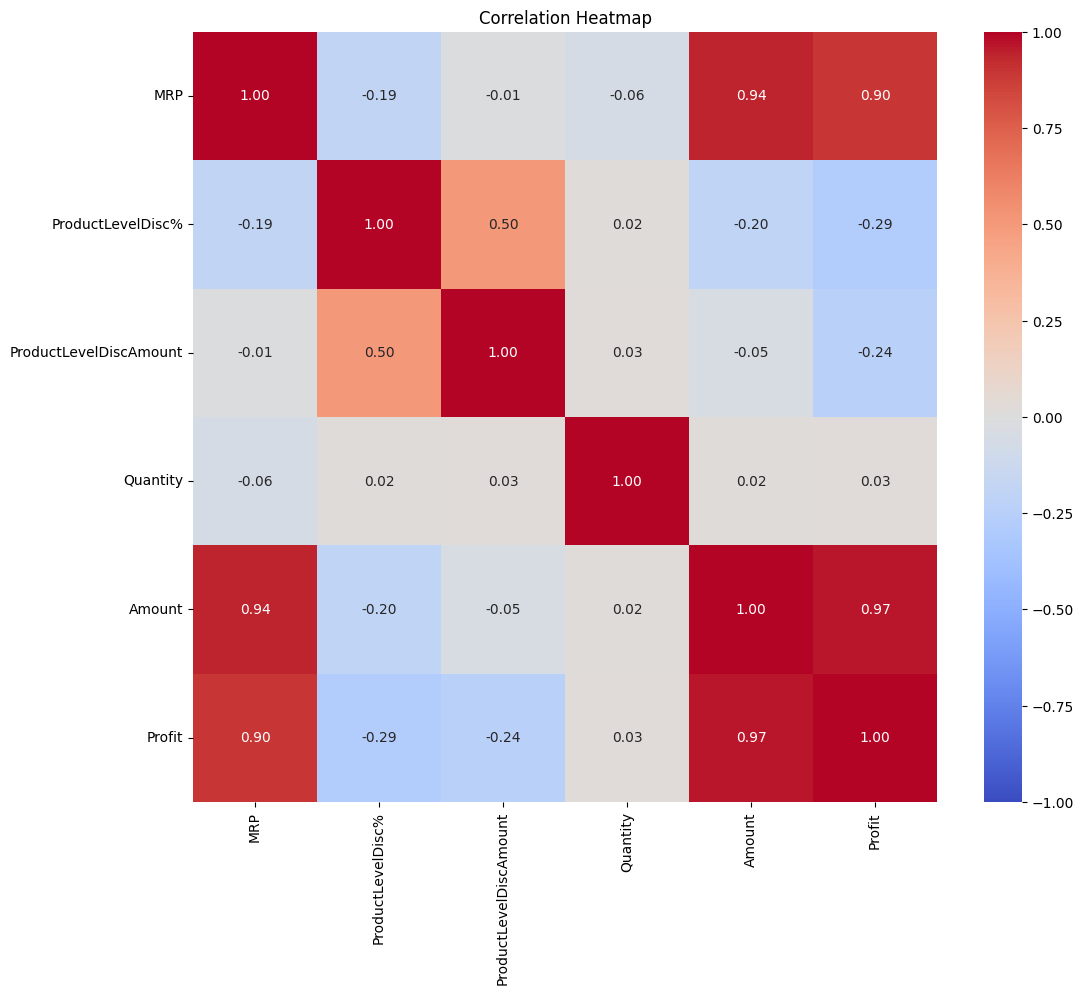

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into a DataFrame named `df`
# Select relevant numerical columns
relevant_columns = [
    'MRP', 'ProductLevelDisc%', 'ProductLevelDiscAmount', 'Quantity', 'Amount', 'Profit'
]

# Drop rows with missing values in the relevant columns (optional, based on your dataset)
df_cleaned = df[relevant_columns].dropna()

# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Drop rows with missing values in the relevant columns
df_cleaned = df[relevant_columns].dropna()

# Function to perform regression and return results
def perform_regression(X, y):
    # Add constant to independent variable
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Extract results
    intercept = model.params.iloc[0]  # Explicit position-based indexing
    slope = model.params.iloc[1]      # Explicit position-based indexing
    r_squared = model.rsquared

    return slope, intercept, r_squared

# Dictionary to store results
regression_results = []

# Loop through all pairs of variables
for i, col1 in enumerate(relevant_columns):
    for j, col2 in enumerate(relevant_columns):
        if i != j:  # Avoid self-regression
            # Regression: col1 as independent, col2 as dependent
            slope, intercept, r_squared = perform_regression(df_cleaned[col1], df_cleaned[col2])
            regression_results.append({
                'Independent Variable': col1,
                'Dependent Variable': col2,
                'Slope': slope,
                'Intercept': intercept,
                'R-squared': r_squared
            })

            # Regression: col2 as independent, col1 as dependent
            slope, intercept, r_squared = perform_regression(df_cleaned[col2], df_cleaned[col1])
            regression_results.append({
                'Independent Variable': col2,
                'Dependent Variable': col1,
                'Slope': slope,
                'Intercept': intercept,
                'R-squared': r_squared
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(regression_results)

# Sort by slope in decreasing order
results_df_sorted = results_df.sort_values(by='Slope', ascending=False)

# Save results to a CSV file
results_df_sorted.to_csv("regression_results_sorted.csv", index=False)

# Print the sorted results
print(results_df_sorted)


      Independent Variable      Dependent Variable         Slope  \
47                Quantity                  Amount  3.374921e+02   
36                Quantity                  Amount  3.374921e+02   
57                Quantity                  Profit  8.308737e+01   
38                Quantity                  Profit  8.308737e+01   
12       ProductLevelDisc%  ProductLevelDiscAmount  3.104135e+01   
23       ProductLevelDisc%  ProductLevelDiscAmount  3.104135e+01   
25                Quantity  ProductLevelDiscAmount  1.762689e+01   
34                Quantity  ProductLevelDiscAmount  1.762689e+01   
58                  Profit                  Amount  5.943175e+00   
49                  Profit                  Amount  5.943175e+00   
50                  Profit                     MRP  4.673204e+00   
9                   Profit                     MRP  4.673204e+00   
6                      MRP                  Amount  1.115535e+00   
41                     MRP                  Amou

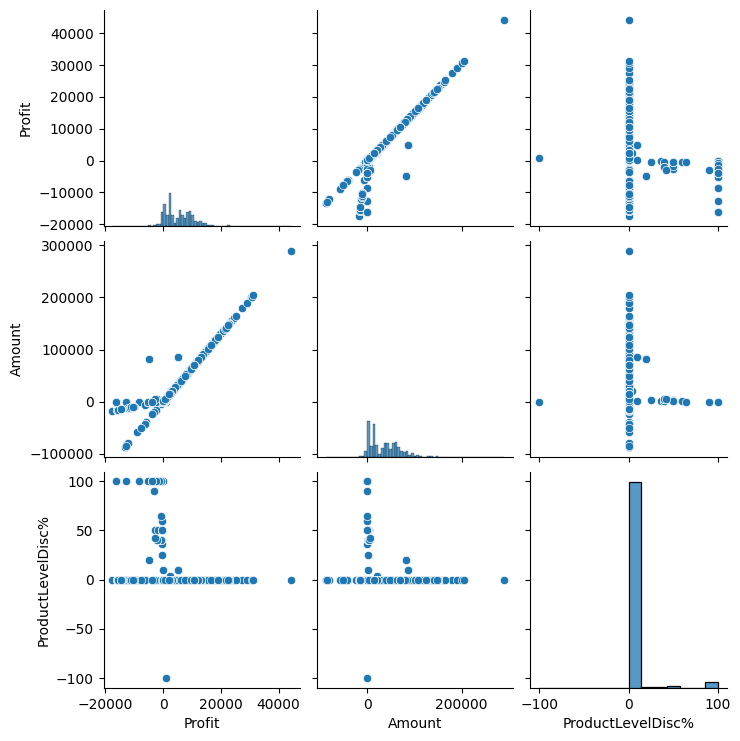

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['Profit', 'Amount', 'ProductLevelDisc%']
sns.pairplot(df[selected_columns])
plt.show()